# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)
4. [Experimento](#experimento)
5. [Conclusión](#conclusion)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/VISION COMPUTACIONAL'
os.chdir(DATA_PATH)

Mounted at /content/drive


## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

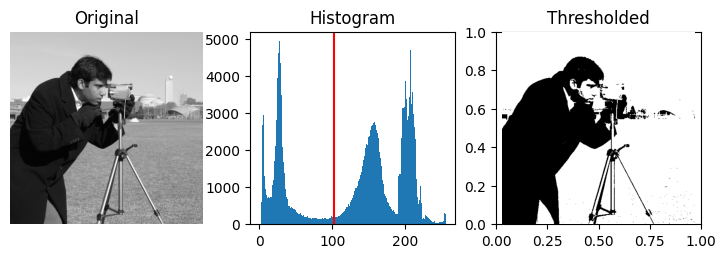

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(9, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




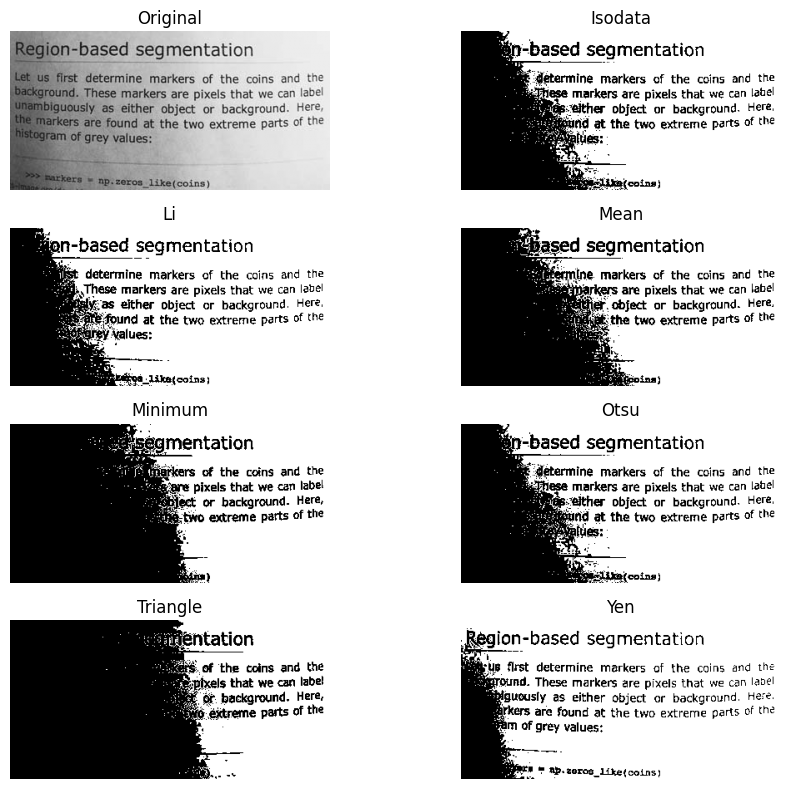

In [ ]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

#### Aquí ajustamos interactívamente el umbral de binarización de una imagen usando un slider. A medida que se cambia el umbral, la imagen binarizada se actualiza y se combina con la imagen original mediante alpha blending. Se muestran tres imágenes: la original, la binarizada y la combinada, lo que facilita la visualización de los efectos del umbral y la mezcla en tiempo real.

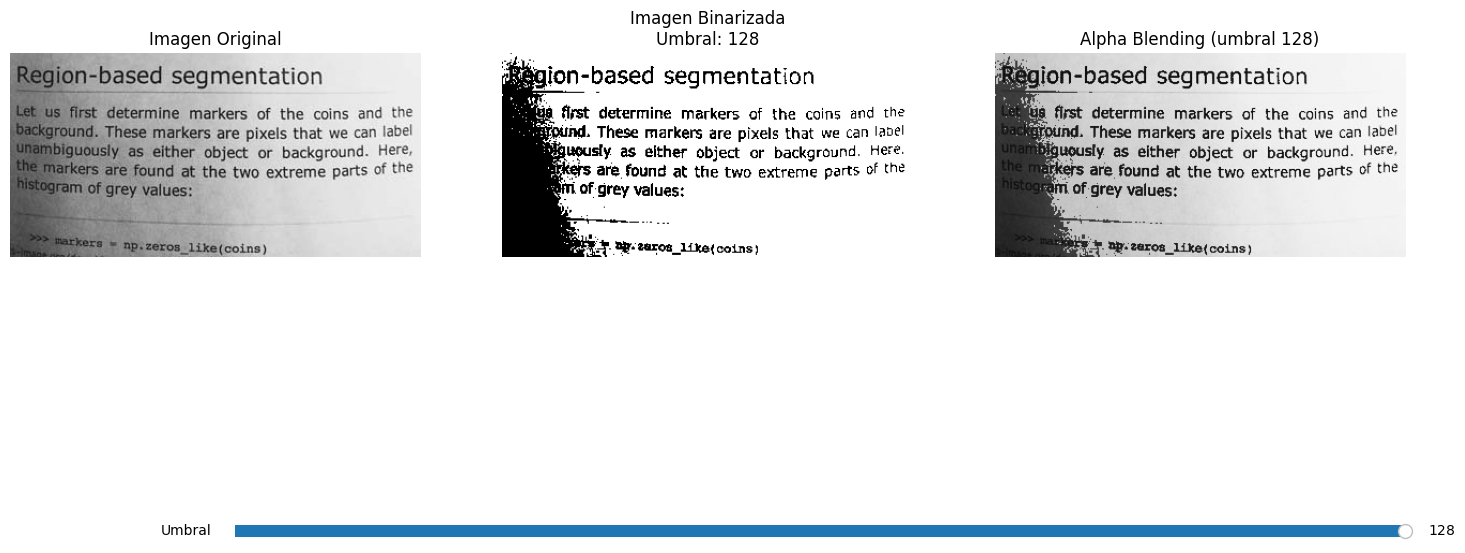

In [ ]:
#TODO:Slide image for segmentation, alpha blerding
from matplotlib.widgets import Slider
import cv2

# Cargar la imagen de ejemplo
img = data.page()

# Función para realizar alpha blending entre la imagen original y la binarizada
def alpha_blending(original, binary, alpha=0.5):
    # Convertir las imágenes a float para realizar blending
    original_float = original.astype(float)
    binary_float = binary.astype(float) * 255  # Convertir la binarizada de 0-1 a 0-255
    blended = cv2.addWeighted(original_float, 1 - alpha, binary_float, alpha, 0)
    return blended

# Función para actualizar la imagen con un umbral ajustado
def update_threshold(val):
    umbral = int(val)  # Convertir el valor del slider a entero
    binary_img = img > umbral  # Binarización: los píxeles mayores que el umbral se convierten en 1 (blanco)

    # Realizar el alpha blending entre la imagen original y la binarizada
    blended_img = alpha_blending(img, binary_img, alpha=0.5)

    # Mostrar las tres imágenes: original, binarizada y blended
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Imagen Original")
    ax[0].axis('off')

    ax[1].imshow(binary_img, cmap='gray')
    ax[1].set_title(f"Imagen Binarizada\nUmbral: {umbral}")
    ax[1].axis('off')

    ax[2].imshow(blended_img.astype(np.uint8), cmap='gray')
    ax[2].set_title(f"Alpha Blending (umbral {umbral})")
    ax[2].axis('off')

    plt.draw()  # Redibujar las imágenes en la interfaz

# Crear la ventana de la figura y los ejes (subgráficas para mostrar las imágenes)
fig, ax = plt.subplots(1, 3, figsize=(18, 8))

# Inicializar la barra deslizante (slider) para ajustar el umbral
ax_slider = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Umbral', 0, 128, valinit=128, valstep=1)

# Conectar el slider a la función de actualización
slider.on_changed(update_threshold)

# Llamar a la función de actualización inicial con el valor del slider
update_threshold(128)

# Mostrar la figura con el control deslizante
plt.show()


## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

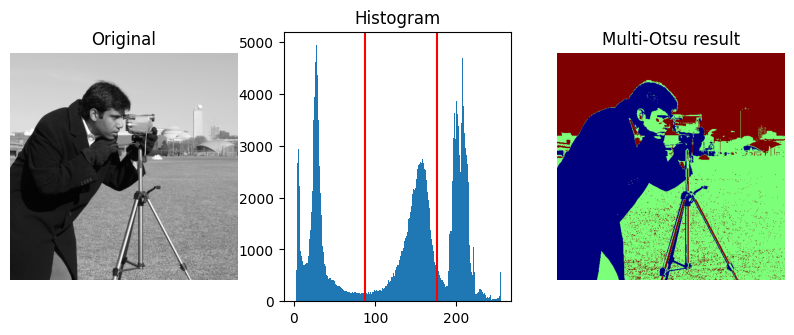

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

#**4.Experimento** <a class="anchor" id="experimento" ></a>

#### Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.

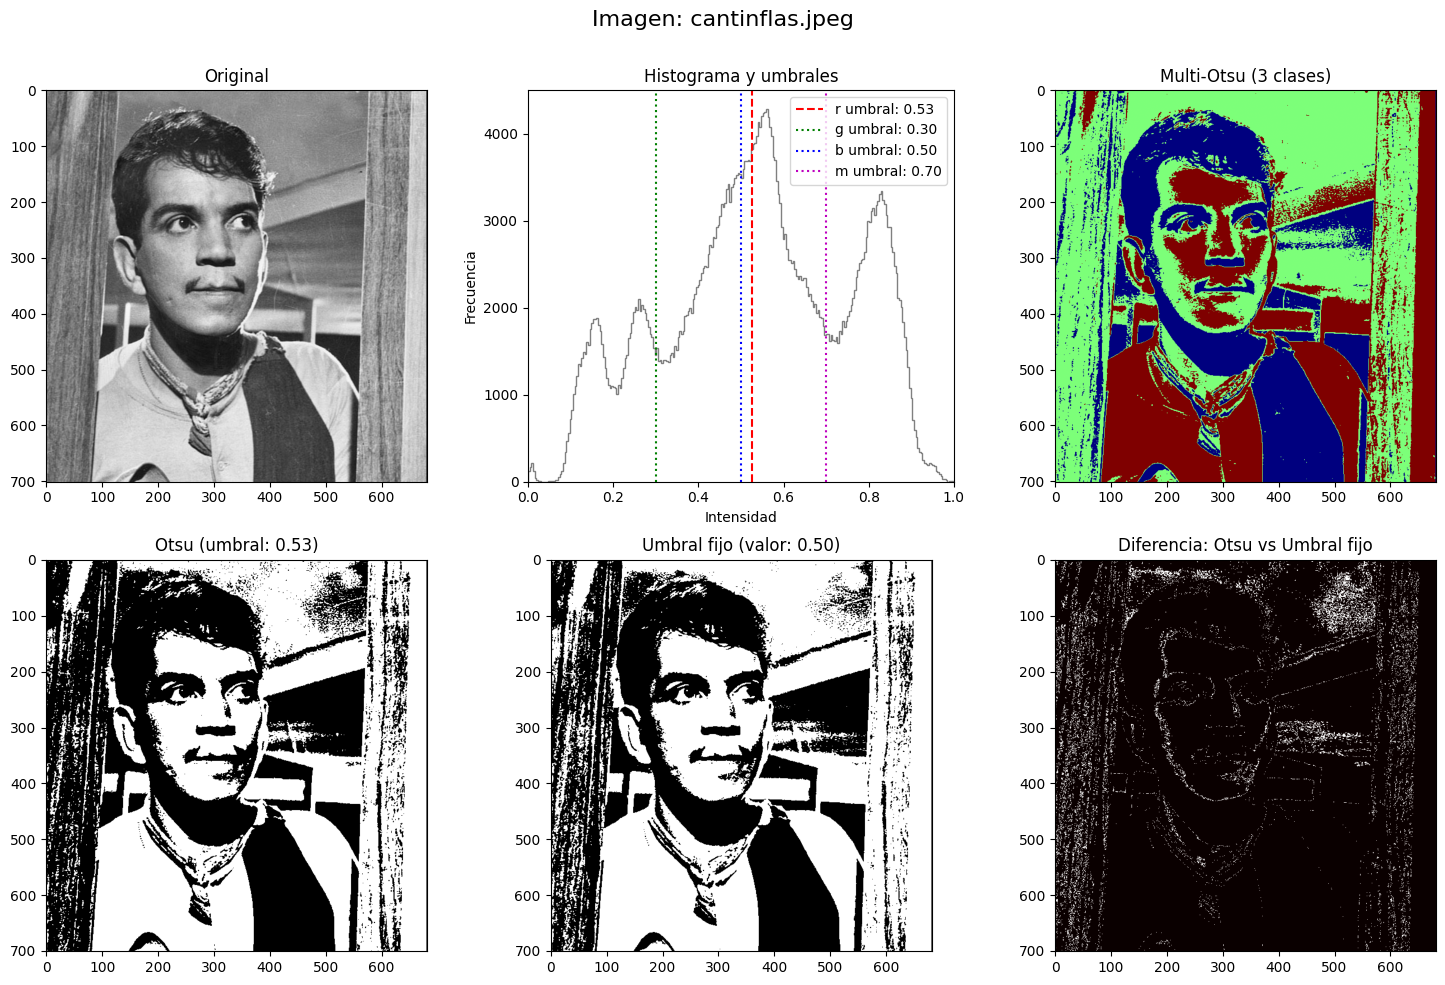

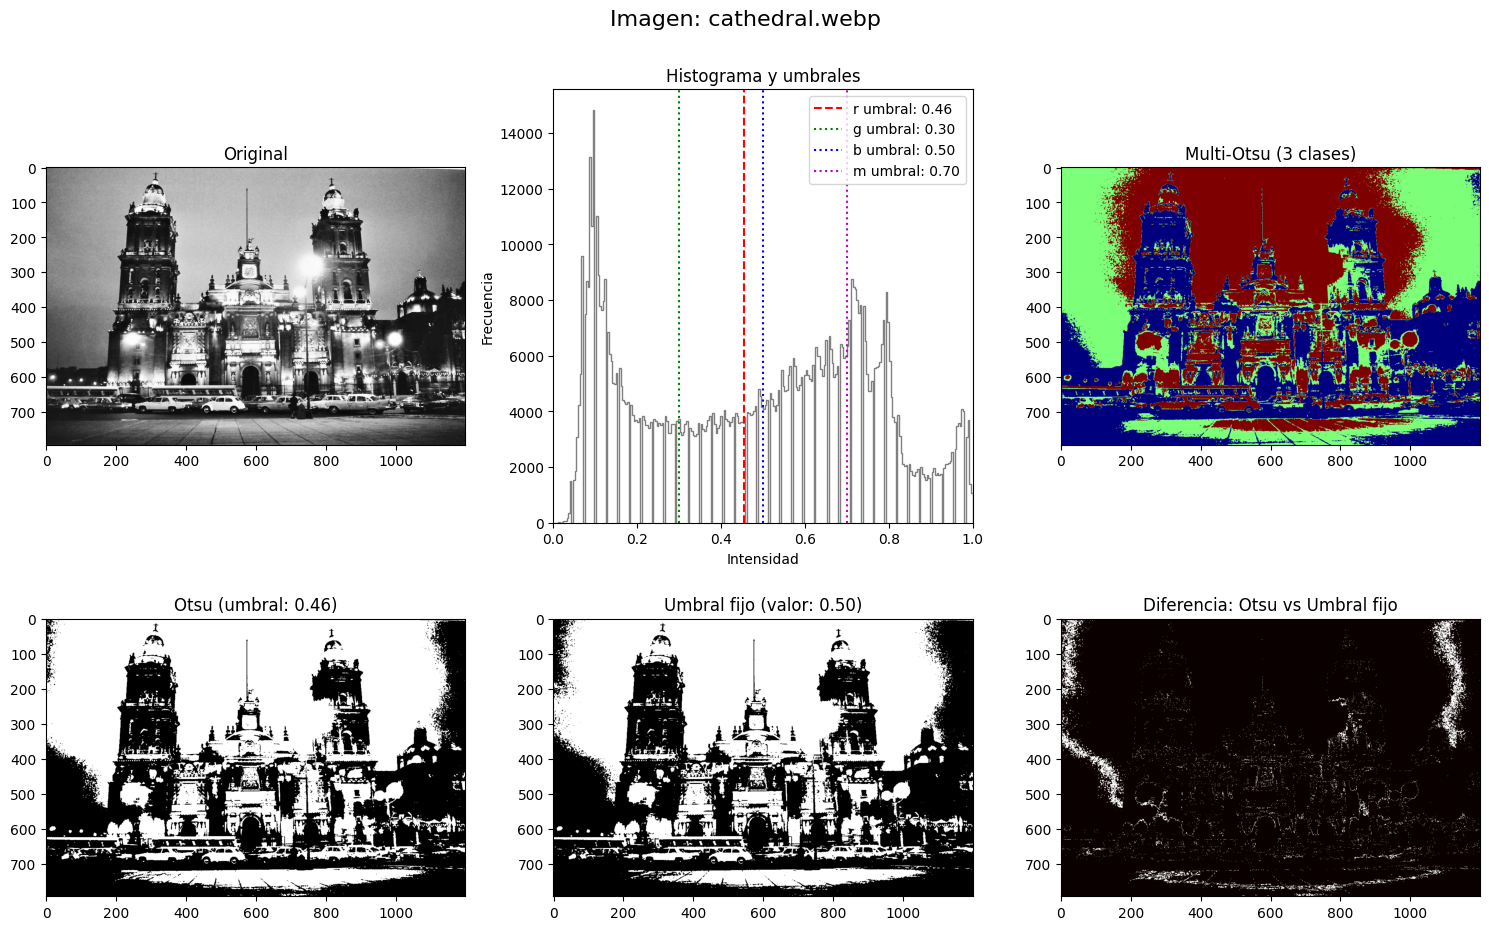

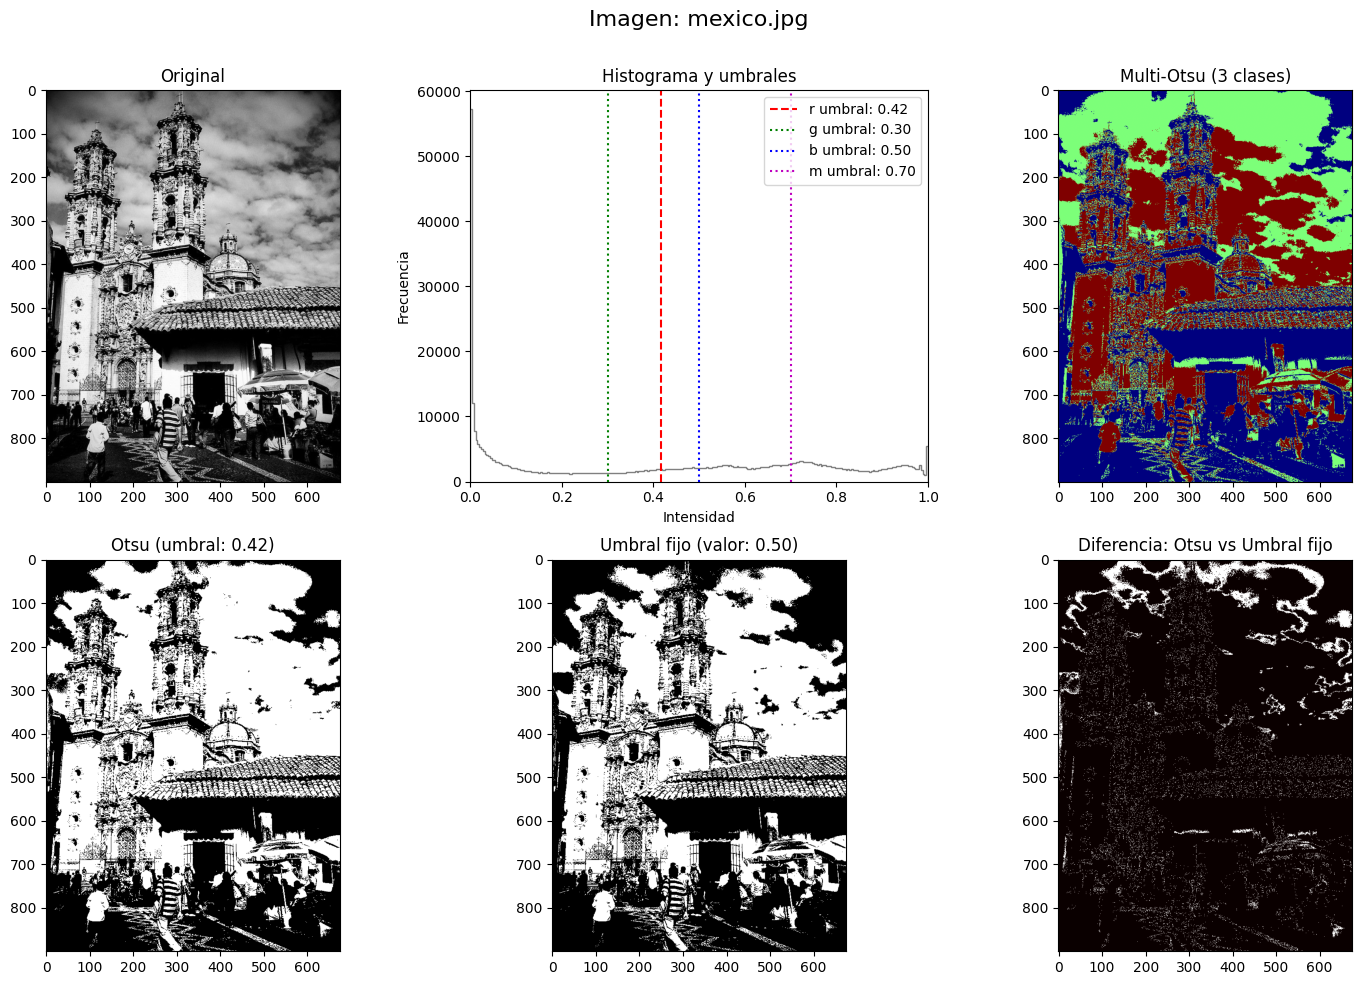

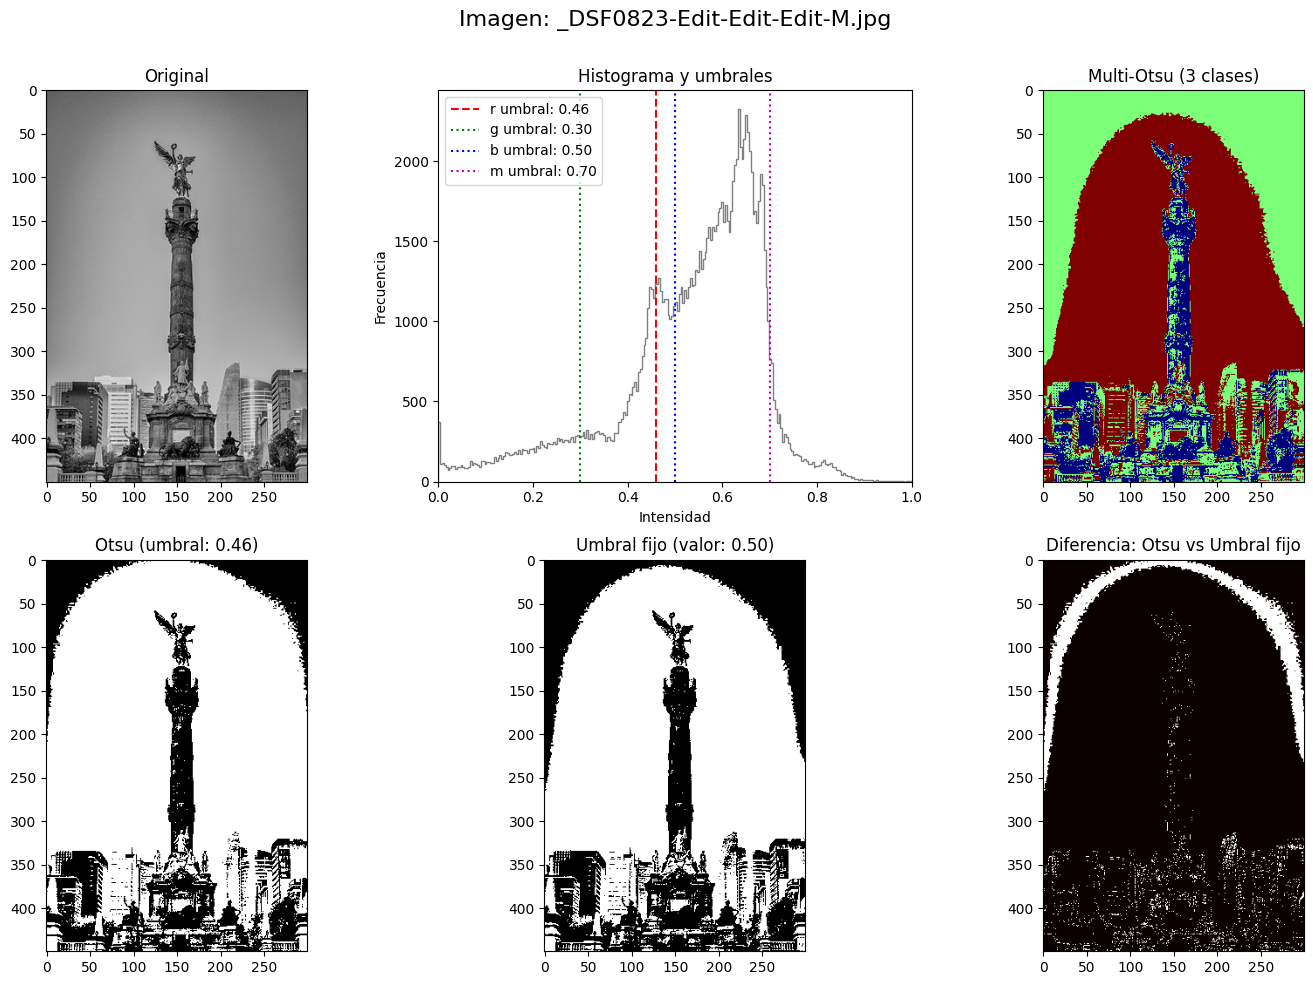

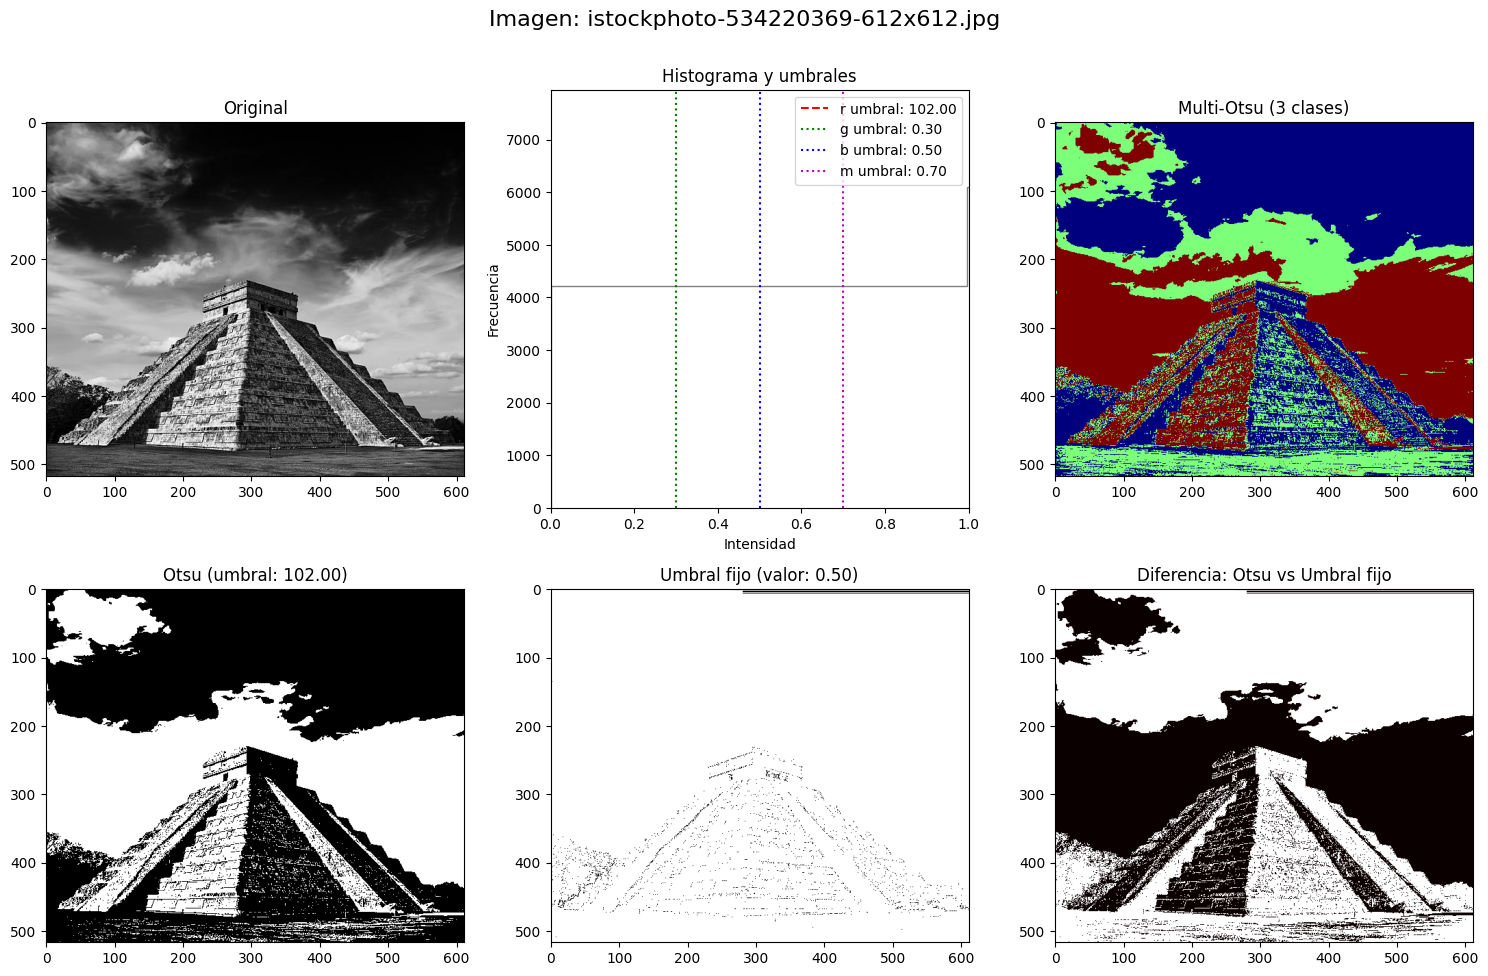

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.filters import threshold_otsu, threshold_multiotsu

def load_image(file_path):
    """
    Carga una imagen desde la ruta proporcionada y la convierte a escala de grises.
    """
    try:
        image = io.imread(file_path)
        if len(image.shape) == 3:
            image = color.rgb2gray(image)  # Convertir a escala de grises
        return image
    except Exception as e:
        print(f"Error al cargar la imagen {file_path}: {e}")
        return None

def apply_thresholds(image):
    """
    Aplica varios métodos de umbralización a la imagen.
    Retorna los resultados de Otsu, umbrales fijos y Multi-Otsu.
    """
    otsu_thresh = threshold_otsu(image)

    # Umbrales fijos
    fixed_thresh_low = 0.3
    fixed_thresh_mid = 0.5
    fixed_thresh_high = 0.7

    # Aplicar umbrales
    binary_otsu = image > otsu_thresh
    binary_fixed_low = image > fixed_thresh_low
    binary_fixed_mid = image > fixed_thresh_mid
    binary_fixed_high = image > fixed_thresh_high

    # Intentar Multi-Otsu
    try:
        thresholds = threshold_multiotsu(image, classes=3)
        regions = np.digitize(image, bins=thresholds)
    except:
        regions = np.zeros_like(image)

    return otsu_thresh, binary_otsu, binary_fixed_low, binary_fixed_mid, binary_fixed_high, regions, fixed_thresh_low, fixed_thresh_mid, fixed_thresh_high # Include fixed thresholds in the return

def plot_histogram(image, ax, thresholds=None):
    """
    Muestra el histograma de la imagen con los umbrales indicados.
    """
    ax.hist(image.ravel(), bins=256, color='gray', histtype='step')
    if thresholds:
        for t, color, linestyle in thresholds:
            ax.axvline(t, color=color, linestyle=linestyle, label=f'{color} umbral: {t:.2f}')
    ax.set_title("Histograma y umbrales")
    ax.set_xlim(0, 1)
    ax.set_xlabel('Intensidad')
    ax.set_ylabel('Frecuencia')
    if thresholds:
        ax.legend()

def compare_thresholds(image, title="Comparación de métodos de umbralización"):
    """
    Compara diferentes métodos de umbralización aplicados a la imagen.
    """
    # Calcular umbrales y resultados
    otsu_thresh, binary_otsu, binary_fixed_low, binary_fixed_mid, binary_fixed_high, regions, fixed_thresh_low, fixed_thresh_mid, fixed_thresh_high = apply_thresholds(image) # Receive fixed thresholds

    # Visualización
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Mostrar imagen original
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original')

    # Mostrar histograma y umbrales
    plot_histogram(image, axes[0, 1], thresholds=[
        (otsu_thresh, 'r', '--'),
        (fixed_thresh_low, 'g', ':'), # fixed_thresh_low is now available
        (fixed_thresh_mid, 'b', ':'),
        (fixed_thresh_high, 'm', ':')
    ])

    # Mostrar Multi-Otsu (3 clases)
    axes[0, 2].imshow(regions, cmap='jet')
    axes[0, 2].set_title('Multi-Otsu (3 clases)')

    # Mostrar resultados de umbralización
    axes[1, 0].imshow(binary_otsu, cmap='gray')
    axes[1, 0].set_title(f'Otsu (umbral: {otsu_thresh:.2f})')

    axes[1, 1].imshow(binary_fixed_mid, cmap='gray')
    axes[1, 1].set_title(f'Umbral fijo (valor: {fixed_thresh_mid:.2f})')


    # Comparar los resultados Otsu vs Umbral fijo
    difference = np.abs(binary_otsu.astype(int) - binary_fixed_mid.astype(int))
    axes[1, 2].imshow(difference, cmap='hot')
    axes[1, 2].set_title('Diferencia: Otsu vs Umbral fijo')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

def process_images_from_folder(data_folder):
    """
    Procesa todas las imágenes en una carpeta y aplica la comparación de umbrales.
    """
    image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff','.webp'))]
    for filename in image_files:
        file_path = os.path.join(data_folder, filename)
        image = load_image(file_path)
        if image is not None:
            compare_thresholds(image, f"Imagen: {filename}")

# Ruta a la carpeta de datos (modifica esta ruta según tu estructura de archivos)
data_folder = 'data1/'  # Aquí va la ruta de tu carpeta de imágenes
process_images_from_folder(data_folder)

#**Conslusión** <a class="anchor" id="conclusion" ></a>


#### Este código ofrece una herramienta útil para analizar y comparar diferentes métodos de segmentación en imágenes en blanco y negro, enfocándose principalmente en técnicas de umbralización. Al cargar imágenes desde una carpeta y convertirlas a escala de grises, se aplica el método de Otsu, que encuentra un umbral óptimo automáticamente, así como tres umbrales fijos predeterminados y un enfoque más avanzado de Multi-Otsu que permite dividir la imagen en tres categorías. A través de la visualización de histogramas y resultados de segmentación, el código permite observar cómo cada método afecta a la imagen y cómo varían los resultados según el umbral utilizado.

#### Esta comparación visual entre diferentes métodos de umbralización proporciona una forma clara y efectiva de entender las ventajas y limitaciones de cada técnica. Además, la visualización de las diferencias entre Otsu y los umbrales fijos permite detectar cómo los cambios en el umbral pueden influir en la calidad de la segmentación. En conjunto, esta herramienta puede ser útil para aquellos que buscan analizar imágenes, optimizar su segmentación y aplicar estos métodos a una variedad de imágenes, incluidas aquellas con temas culturales o históricos, como las imágenes mexicanas en blanco y negro mencionadas en el contexto del código.